In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

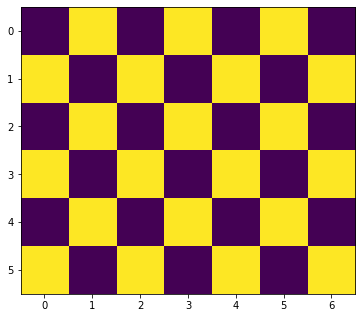

In [2]:
#board view
test = np.array([[0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1]])

plt.figure(figsize=(6,6))
plt.imshow(test)

In [4]:
def userMove(player,col,grid):
    '''input player, column,grid
    return error if grid is full
    output new grid'''
    
    if grid[0,col] != 0:
        print('column full')
        return grid
    
    for i in range(5,-1,-1):
        if grid[i,col] == 0:
            row = i
            break
    
    if player == 0:
        grid[row,col] = 1

    else:
        grid[row,col] = 2
        
    return grid

In [6]:
def randomMove(player,grid):
    '''perform random legal move'''
    
    #find non-full columns
    choice_columns = []
    for column in range(0,7):
        if grid[0,column] == 0:
            choice_columns.append(column)
            
    #randomly select non-full column
    col = random.choice(choice_columns)
    
    #update grid value by player
    for row in range(5,-1,-1):
        if grid[row,col] == 0:
            break
    
    if player == 0:
        grid[row,col] = 1
    else:
        grid[row,col] = 2
        
    return grid

In [86]:
def winnerEval(grid):
    '''iter through horizontal, vertical, diagonal / \ win patterns'''
    winner = False
    
    #horizontal winner
    for i in range(6):
        frame_left = 0
        for j in range(4):
            frame = grid[i,frame_left:frame_left + 4]
            if set(frame) == {1} or set(frame) == {2}:
                winner = True
                break
            frame_left += 1
                
        if winner == True:
            return set(frame), [(i,frame_left),(i,frame_left+1),(i,frame_left+2),(i,frame_left+3)]
        
    #vertical winner
    for i in range(7):
        frame_top = 0
        for j in range(0,3):
            frame = grid[frame_top:frame_top + 4,i]
            if set(frame) == {1} or set(frame) == {2}:
                winner = True
                break
            frame_top += 1
                
        if winner == True:
            return set(frame), [(frame_top,i),(frame_top+1,i),(frame_top+2,i),(frame_top+3,i)]
     
    #// diagonal winner
    for i in range(3,6):
        for j in range(0,4):
            frame = [grid[i,j], grid[i-1,j+1], grid[i-2,j+2], grid[i-3,j+3]]
            if set(frame) == {1} or set(frame) == {2}:
                winner = True
                break
                
        if winner == True:
            return set(frame), [(i,j),(i-1,j+1),(i-2,j+2),(i-3,j+3)]
                
    #\\ diagonal winner
    for i in range(3,6):
        for j in range(6,2,-1):
            frame = [grid[i,j], grid[i-1,j-1], grid[i-2,j-2], grid[i-3,j-3]]
            if set(frame) == {1} or set(frame) == {2}:
                winner = True
                break
                
        if winner == True:
            return set(frame), [(i,j),(i-1,j-1),(i-2,j-2),(i-3,j-3)]

({1}, [(5, 5), (4, 4), (3, 3), (2, 2)])


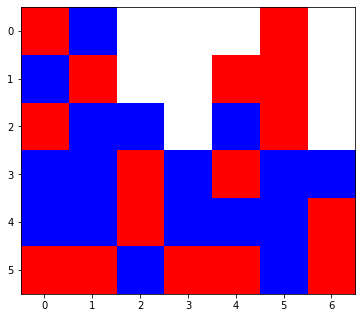

In [131]:
#play a single game

#clear board
grid =  np.full((6, 7), 0)

#iter max 42 moves
for player in [0,1]*21:
    grid = random_move(player,grid)
    #check for winner
    check_win = winnerEval(grid)
    if check_win is None:
        pass
    else:
        break

print(check_win)
          
#show completed game
grid_viz = grid * -1
grid_viz[grid_viz == 0] = 1
grid_viz[grid_viz == -1] = 0
grid_viz[grid_viz == -2] = 2

plt.figure(figsize=(6,6))
plt.imshow(grid_viz,'bwr')
plt.show()

#player1 is blue
#player2 is red

In [134]:
win_p0 = 0
win_p1 = 0
draw = 0

for i in tqdm(range(10000)):
    grid =  np.full((6, 7), 0)
    count = 0

    for player in [0,1]*21:
        grid = random_move(player,grid)
    
        check_win = winnerEval(grid)
        if check_win is None:
            count += 1
            pass
        elif check_win[0] == {1}:
            win_p0 += 1
            break
        elif check_win[0] == {2}:
            win_p1 += 1
            break
        
        if count == 42:
            draw += 1

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 224.88it/s]


In [135]:
print(win_p0)
print(win_p1)
print(draw)

5597
4382
21
